---

# **<font color="#6767bf"> Modelación Climática Tropical</font>**
## **<font color="#8282d6"> Atlantic Multidecadal Variability </font>**
### **<font color="#a6a6f1"> Índices, mapas y anomalías GPCP</font>**


---

In [1]:
pip install xarray

  Using cached xarray-2025.10.1-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
Using cached xarray-2025.10.1-py3-none-any.whl (1.4 MB)
Using cached packaging-25.0-py3-none-any.whl (66 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

  Using cached cftime-1.6.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

  Using cached h5netcdf-1.7.3-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.15.1-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (3.0 kB)
Using cached h5netcdf-1.7.3-py3-none-any.whl (56 kB)
Using cached h5py-3.15.1-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (4.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

  Using cached netcdf4-1.7.3-cp311-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.9 kB)
Using cached netcdf4-1.7.3-cp311-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (9.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cartopy

  Using cached cartopy-0.25.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached pyshp-3.0.2.post1-py3-none-any.whl.metadata (64 kB)
Using cached cartopy-0.25.0-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (11.8 MB)
Using cached pyshp-3.0.2.post1-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
#Paqueterias
import pandas as pd
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
from scipy import stats

In [7]:
def mapa_MC(data, levels, ccmap, titulo, extend='both', cbarlabel='pr  [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [8]:
# Cargamos el archivo del índice AMV de la NOAA
file_path = 'AMV_NOAA_df.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])  

In [9]:
# Obtenemos los valores positivos
#positivos = amv_JJAS[amv_JJAS['AMV_NOAA'] > 0]
#positivos

In [10]:
df['rolled']=df.AMV_NOAA.rolling(window=120, min_periods=60).mean()

In [11]:
# se filtran los meses de JJAS
amv_JJAS = df[df['Date'].dt.month.isin([6, 7, 8, 9])]
print(amv_JJAS)

           Date  AMV_NOAA    rolled
5    1854-06-15     -0.18       NaN
6    1854-07-15     -0.07       NaN
7    1854-08-15     -0.20       NaN
8    1854-09-15     -0.04       NaN
17   1855-06-15     -0.06       NaN
...         ...       ...       ...
2024 2022-09-15      0.98  0.592750
2033 2023-06-15      1.27  0.624000
2034 2023-07-15      1.44  0.631583
2035 2023-08-15      1.36  0.638750
2036 2023-09-15      1.42  0.645500

[680 rows x 3 columns]


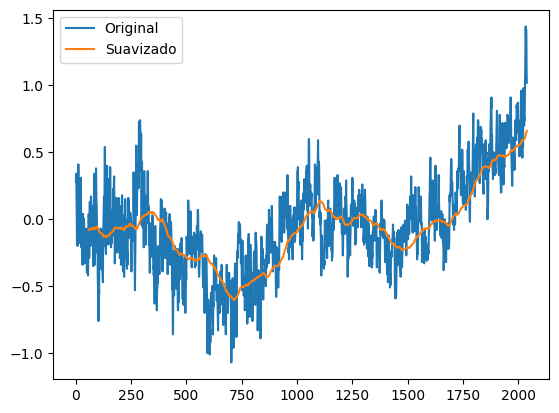

In [12]:
plt.plot(df.AMV_NOAA,label='Original')
plt.plot(df.rolled,label='Suavizado')
plt.legend()

In [13]:
# Imprimimos los valores negativos
negativos = amv_JJAS[amv_JJAS['AMV_NOAA'] < 0]
negativos

,Date,AMV_NOAA,rolled
5,1854-06-15,-0.18,NaN
6,1854-07-15,-0.07,NaN
7,1854-08-15,-0.20,NaN
8,1854-09-15,-0.04,NaN
17,1855-06-15,-0.06,NaN
...,...,...,...
1687,1994-08-15,-0.22,-0.046417
1688,1994-09-15,-0.18,-0.047083
1709,1996-06-15,-0.03,0.023917
1710,1996-07-15,-0.08,0.024833


In [14]:
# Debemos cargar los archivos, tanto el csv como el .nc 
# Archivo de precipitación GPCP
filename='/home/jovyan/ModClim/datos_actualizados/precip.mon.mean.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr['units']='mm day-1'

In [15]:
lons=pr.lon
lats=pr.lat
#pr=pr.loc[dict(lat=lats[lats>0])]
#pr=pr.loc[dict(lon=lons[lons>180])]

In [16]:
df_csv=df

In [17]:
# Tenemos que obtener el promedio de los años con AMV 
pr=pr.sel(time=slice('1979', '2024'))
pr_jjas=pr.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)
print(pr_jjas)

<xarray.DataArray 'precip' (time: 184, lat: 72, lon: 144)> Size: 8MB
array([[[0.40025383, 0.34795108, 0.34621078, ..., 0.4018895 ,
         0.42617947, 0.4698062 ],
        [0.34051663, 0.3371525 , 0.34920245, ..., 0.34229475,
         0.35928172, 0.38886547],
        [0.35160318, 0.36551303, 0.34649962, ..., 0.39019996,
         0.43633172, 0.4101075 ],
        ...,
        [0.39982226, 0.40422487, 0.40118226, ..., 0.3604558 ,
         0.3675577 , 0.39589337],
        [0.38911846, 0.3938013 , 0.43551448, ..., 0.3819375 ,
         0.3952889 , 0.38754708],
        [0.48018825, 0.48731658, 0.502514  , ..., 0.4427042 ,
         0.494787  , 0.4228968 ]],

       [[0.76156414, 0.73333204, 0.7075794 , ..., 0.86881495,
         0.91359985, 0.8990467 ],
        [0.6876706 , 0.64745694, 0.59479564, ..., 0.626326  ,
         0.70419765, 0.70871574],
        [0.5326506 , 0.51074487, 0.48973408, ..., 0.518493  ,
         0.58836466, 0.5749376 ],
...
        [1.3137335 , 1.4116378 , 1.5569592 , ...

In [18]:
def select_matching_time(datetime_index: pd.DatetimeIndex, data_array: xr.DataArray):
    xarray_time = pd.DatetimeIndex(data_array['time'].values)
    xarray_year_month = xarray_time.to_period('M')  
    
    index_year_month = datetime_index.to_period('M')
    print(index_year_month)
    print(xarray_year_month)
    matching_times = xarray_time[xarray_year_month.isin(index_year_month)]
    return data_array.sel(time=matching_times)

In [19]:
# Y ya obtenemos los indices positivos y negativos de las fechas con AMV ya filtradas en JJAS
positivos_nc = pd.to_datetime(amv_JJAS[amv_JJAS['rolled'] > 0]['Date'].values)
negativos_nc = pd.to_datetime(amv_JJAS[amv_JJAS['rolled'] < 0]['Date'].values)

In [20]:
pr_positivos=select_matching_time(positivos_nc, pr_jjas)

PeriodIndex(['1878-08', '1878-09', '1879-06', '1879-07', '1879-08', '1879-09',
             '1880-06', '1880-07', '1880-08', '1880-09',
             ...
             '2021-08', '2021-09', '2022-06', '2022-07', '2022-08', '2022-09',
             '2023-06', '2023-07', '2023-08', '2023-09'],
            dtype='period[M]', length=221)
PeriodIndex(['1979-06', '1979-07', '1979-08', '1979-09', '1980-06', '1980-07',
             '1980-08', '1980-09', '1981-06', '1981-07',
             ...
             '2022-08', '2022-09', '2023-06', '2023-07', '2023-08', '2023-09',
             '2024-06', '2024-07', '2024-08', '2024-09'],
            dtype='period[M]', length=184)


In [21]:
pr_positivos

<xarray.DataArray 'precip' (time: 112, lat: 72, lon: 144)> Size: 5MB
array([[[0.8564635 , 0.6116259 , 0.5421403 , ..., 0.8492635 ,
         0.6538356 , 0.85965085],
        [0.39592236, 0.48209196, 0.40231365, ..., 0.3493052 ,
         0.44532916, 0.45010254],
        [0.23307632, 0.12006947, 0.09040769, ..., 0.3104518 ,
         0.25338235, 0.22787482],
        ...,
        [0.23069897, 0.32639676, 0.29207778, ..., 0.21210153,
         0.2419067 , 0.2755159 ],
        [0.25060275, 0.27745792, 0.22118564, ..., 0.29930538,
         0.23875463, 0.23535566],
        [0.52975893, 0.36462754, 0.4289777 , ..., 0.26089284,
         0.35176304, 0.23602648]],

       [[0.43920702, 0.45169908, 0.4027574 , ..., 0.8191512 ,
         0.6858512 , 0.67558396],
        [1.2973267 , 0.94984096, 0.9633306 , ..., 1.0733277 ,
         0.9162092 , 1.1760085 ],
        [1.504455  , 1.1723872 , 0.7872515 , ..., 0.7876607 ,
         1.3225348 , 1.3259015 ],
...
        [1.9610968 , 2.094205  , 2.1850986 , ..., 1.6350446 ,
         1.7430604 , 1.8526855 ],
        [1.6941409 , 1.7937926 , 1.9182388 , ..., 1.489977  ,
         1.5337511 , 1.6015193 ],
        [1.3552506 , 1.375085  , 1.4024345 , ..., 1.3085881 ,
         1.3355948 , 1.3473538 ]],

       [[1.0604724 , 1.0556167 , 1.0470651 , ..., 1.0974538 ,
         1.0772825 , 1.062151  ],
        [0.5731962 , 0.55953246, 0.5471749 , ..., 0.61786103,
         0.60915786, 0.589972  ],
        [0.31226048, 0.30908677, 0.300009  , ..., 0.31258518,
         0.3137935 , 0.31521502],
        ...,
        [1.0454044 , 1.1149869 , 1.1389371 , ..., 0.9746824 ,
         0.981443  , 0.9953743 ],
        [0.9795117 , 1.0179212 , 1.0219964 , ..., 0.9225851 ,
         0.9395085 , 0.9501199 ],
        [0.972297  , 0.97518647, 0.9752995 , ..., 0.96670705,
         0.9768543 , 0.9767163 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 896B 1996-06-01 1996-07-01 ... 2023-09-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    units    <U8 32B 'mm day-1'
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.       47.327435]

In [22]:
pr_negativos=select_matching_time(negativos_nc, pr_jjas)

PeriodIndex(['1859-06', '1859-07', '1859-08', '1859-09', '1860-06', '1860-07',
             '1860-08', '1860-09', '1861-06', '1861-07',
             ...
             '1993-08', '1993-09', '1994-06', '1994-07', '1994-08', '1994-09',
             '1995-06', '1995-07', '1995-08', '1995-09'],
            dtype='period[M]', length=439)
PeriodIndex(['1979-06', '1979-07', '1979-08', '1979-09', '1980-06', '1980-07',
             '1980-08', '1980-09', '1981-06', '1981-07',
             ...
             '2022-08', '2022-09', '2023-06', '2023-07', '2023-08', '2023-09',
             '2024-06', '2024-07', '2024-08', '2024-09'],
            dtype='period[M]', length=184)


In [23]:
pr_negativos

<xarray.DataArray 'precip' (time: 68, lat: 72, lon: 144)> Size: 3MB
array([[[0.40025383, 0.34795108, 0.34621078, ..., 0.4018895 ,
         0.42617947, 0.4698062 ],
        [0.34051663, 0.3371525 , 0.34920245, ..., 0.34229475,
         0.35928172, 0.38886547],
        [0.35160318, 0.36551303, 0.34649962, ..., 0.39019996,
         0.43633172, 0.4101075 ],
        ...,
        [0.39982226, 0.40422487, 0.40118226, ..., 0.3604558 ,
         0.3675577 , 0.39589337],
        [0.38911846, 0.3938013 , 0.43551448, ..., 0.3819375 ,
         0.3952889 , 0.38754708],
        [0.48018825, 0.48731658, 0.502514  , ..., 0.4427042 ,
         0.494787  , 0.4228968 ]],

       [[0.76156414, 0.73333204, 0.7075794 , ..., 0.86881495,
         0.91359985, 0.8990467 ],
        [0.6876706 , 0.64745694, 0.59479564, ..., 0.626326  ,
         0.70419765, 0.70871574],
        [0.5326506 , 0.51074487, 0.48973408, ..., 0.518493  ,
         0.58836466, 0.5749376 ],
...
        [0.8323035 , 0.8125695 , 0.9992669 , ..., 0.78031766,
         0.8448886 , 0.8273351 ],
        [0.72964495, 0.7631975 , 0.7022031 , ..., 0.81887156,
         0.9104294 , 0.8794922 ],
        [0.8110153 , 1.0003457 , 1.7048929 , ..., 0.94576514,
         1.0507429 , 0.83986366]],

       [[0.15803897, 0.18288109, 0.1542389 , ..., 0.29282773,
         0.40730387, 0.26628408],
        [0.13257779, 0.18407981, 0.11248242, ..., 0.2604047 ,
         0.31718102, 0.15709992],
        [0.09848745, 0.09569174, 0.13161184, ..., 0.16486989,
         0.15824294, 0.15524507],
        ...,
        [0.73343104, 0.784881  , 0.781485  , ..., 0.8726369 ,
         0.8546415 , 0.7059935 ],
        [0.45225534, 0.69000435, 0.48699638, ..., 0.5664312 ,
         0.5638196 , 0.70968264],
        [0.56730694, 0.38542798, 0.51278144, ..., 0.32002434,
         0.37255776, 0.3633544 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 544B 1979-06-01 1979-07-01 ... 1995-09-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    units    <U8 32B 'mm day-1'
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.       47.327435]

promedio_positivos = pr_positivos.mean(dim='month')
promedio_negativos = pr_negativos.mean(dim='month')

In [24]:
def funcionsita(da):
    mes_p=da.groupby(da.time.dt.month).mean()
    promedio = mes_p.mean(dim='month')
    return promedio

In [25]:
promedio_positivos = funcionsita(pr_positivos)
promedio_negativos = funcionsita(pr_negativos)
pr_positivos

<xarray.DataArray 'precip' (time: 112, lat: 72, lon: 144)> Size: 5MB
array([[[0.8564635 , 0.6116259 , 0.5421403 , ..., 0.8492635 ,
         0.6538356 , 0.85965085],
        [0.39592236, 0.48209196, 0.40231365, ..., 0.3493052 ,
         0.44532916, 0.45010254],
        [0.23307632, 0.12006947, 0.09040769, ..., 0.3104518 ,
         0.25338235, 0.22787482],
        ...,
        [0.23069897, 0.32639676, 0.29207778, ..., 0.21210153,
         0.2419067 , 0.2755159 ],
        [0.25060275, 0.27745792, 0.22118564, ..., 0.29930538,
         0.23875463, 0.23535566],
        [0.52975893, 0.36462754, 0.4289777 , ..., 0.26089284,
         0.35176304, 0.23602648]],

       [[0.43920702, 0.45169908, 0.4027574 , ..., 0.8191512 ,
         0.6858512 , 0.67558396],
        [1.2973267 , 0.94984096, 0.9633306 , ..., 1.0733277 ,
         0.9162092 , 1.1760085 ],
        [1.504455  , 1.1723872 , 0.7872515 , ..., 0.7876607 ,
         1.3225348 , 1.3259015 ],
...
        [1.9610968 , 2.094205  , 2.1850986 , ..., 1.6350446 ,
         1.7430604 , 1.8526855 ],
        [1.6941409 , 1.7937926 , 1.9182388 , ..., 1.489977  ,
         1.5337511 , 1.6015193 ],
        [1.3552506 , 1.375085  , 1.4024345 , ..., 1.3085881 ,
         1.3355948 , 1.3473538 ]],

       [[1.0604724 , 1.0556167 , 1.0470651 , ..., 1.0974538 ,
         1.0772825 , 1.062151  ],
        [0.5731962 , 0.55953246, 0.5471749 , ..., 0.61786103,
         0.60915786, 0.589972  ],
        [0.31226048, 0.30908677, 0.300009  , ..., 0.31258518,
         0.3137935 , 0.31521502],
        ...,
        [1.0454044 , 1.1149869 , 1.1389371 , ..., 0.9746824 ,
         0.981443  , 0.9953743 ],
        [0.9795117 , 1.0179212 , 1.0219964 , ..., 0.9225851 ,
         0.9395085 , 0.9501199 ],
        [0.972297  , 0.97518647, 0.9752995 , ..., 0.96670705,
         0.9768543 , 0.9767163 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 896B 1996-06-01 1996-07-01 ... 2023-09-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    units    <U8 32B 'mm day-1'
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.       47.327435]

In [26]:
# Seleccionamos los meses JJAS del csv
#df_csv[df_csv['Date'].dt.month.isin([6, 7, 8, 9])]
# Ahora si va la climatología JJAS del archivo .nc
promedio_total_JJAS = pr.sel(time=pr['time'].dt.month.isin([6, 7, 8, 9])).mean(dim='time')

In [27]:
# Calculando las anomalías:
anom_positivos = promedio_positivos - promedio_total_JJAS
anom_negativos = promedio_negativos - promedio_total_JJAS
anom_total = promedio_positivos - promedio_negativos
print(anom_total)
# Guardar la matriz de coeficientes de regresión en un archivo
#anom_positivos.to_netcdf('anom_positivos_GPCP.nc')
#anom_negativos.to_netcdf('anom_negativos_GPCP.nc')
#anom_total.to_netcdf('anom_total_GPCP_min.nc') #antes decia anom_total_GPCP_actualizado

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
array([[ 0.01080924,  0.04049802,  0.03195816, ...,  0.02879703,
         0.01219583, -0.02699864],
       [-0.04974291, -0.06518981, -0.05569601, ..., -0.03544068,
        -0.0473232 , -0.04382417],
       [ 0.00286227, -0.00752673,  0.01044196, ...,  0.00317809,
        -0.0150851 , -0.02596629],
       ...,
       [ 0.09394115,  0.09650135,  0.09378207, ...,  0.10222656,
         0.09844834,  0.09196603],
       [ 0.14564645,  0.11519712,  0.1165539 , ...,  0.12991375,
         0.12474036,  0.11646545],
       [ 0.08316278,  0.07244813,  0.08197993, ...,  0.10668844,
         0.10824585,  0.09757197]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    units    <U8 32B 'mm day-1'


In [28]:
def calculate_p_values(data1, data2):
    # Definir la función para la prueba t
    def ttest_func(x, y):
        # Eliminar nalores nulos
        x = x[~np.isnan(x)]
        y = y[~np.isnan(y)]
        # y también verificar que haya datos
        if len(x) > 1 and len(y) > 1:
            t_stat, p = stats.ttest_ind(x, y, equal_var=False)
            return p
        else:
            return np.nan

    # Aplicar la función 
    p_values = xr.apply_ufunc(
        ttest_func, data1, data2,
        input_core_dims=[['time'], ['time']],  # Especificar tiempo
        vectorize=True,                        # Vectorizar 
        dask='parallelized', 
        join='outer',
        output_dtypes=[float]                 
    )

    return p_values

In [29]:
# Calcular los p-values
p_values = calculate_p_values(pr_positivos, pr_negativos)
p_values

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 83kB
array([[0.83767333, 0.43264165, 0.52906269, ..., 0.5833815 , 0.81845204,
        0.61225842],
       [0.24373313, 0.11709128, 0.17124089, ..., 0.42998197, 0.26485257,
        0.29918008],
       [0.94045879, 0.83864989, 0.74888017, ..., 0.93720709, 0.71604055,
        0.5266026 ],
       ...,
       [0.07405027, 0.06417861, 0.07584002, ..., 0.05877244, 0.06883368,
        0.07696987],
       [0.01003845, 0.04690262, 0.04022335, ..., 0.01969196, 0.02884439,
        0.04088868],
       [0.20593427, 0.28404106, 0.2095987 , ..., 0.107275  , 0.0829568 ,
        0.13371131]])
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    units    <U8 32B 'mm day-1'

In [30]:
lons=anom_total.lon
lats=anom_total.lat

In [31]:
def mapa_MC(data, levels, ccmap, titulo, p_values=None, p_levels=None, hatches=None, extend='both', 
            cbarlabel='pr  [mm día$^{-1}$]', limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    
    # Plot de contorno
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

    # Hatching con 0.05
    if p_values is not None and p_levels is not None and hatches is not None:
        # Aplicar hatching
        hatch_mask = p_values > 0.05  
        hatching = ax.contourf(lons, lats, hatch_mask, levels=[0, 0.05], colors='none', alpha=0.02,
                                hatches=hatches, transform=ccrs.PlateCarree())
    
    plt.show() 

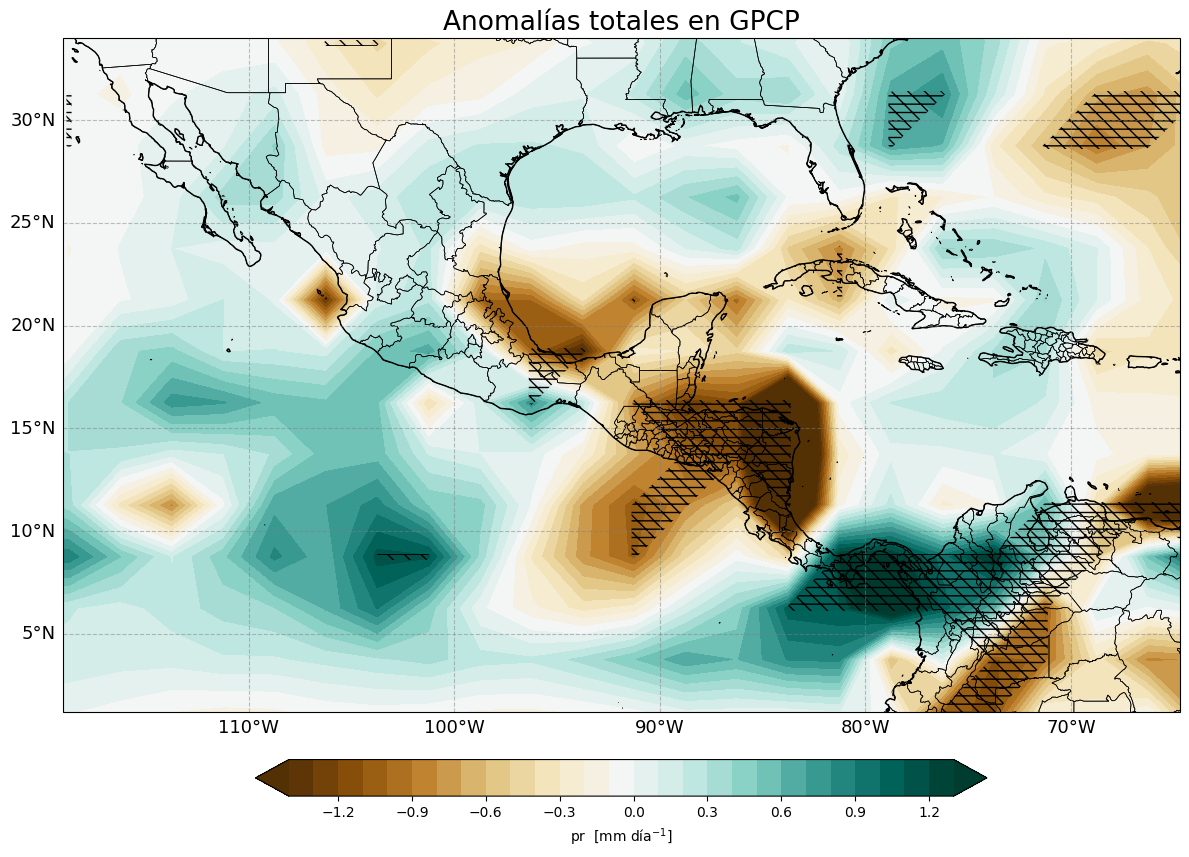

In [32]:
mapa_MC(anom_total, np.arange(-1.4, 1.4, 0.1),'BrBG','Anomalías totales en GPCP', p_values=p_values,                         
    p_levels=np.array([0.01,0.02,0.03,0.04,0.05]),  
    hatches=['\-\-'],                           
    extend='both',
    lon_min=240.9375,
    lon_max=295.3125,
    lat_min=1.2,
    lat_max=34)

In [33]:
anom_total

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
array([[ 0.01080924,  0.04049802,  0.03195816, ...,  0.02879703,
         0.01219583, -0.02699864],
       [-0.04974291, -0.06518981, -0.05569601, ..., -0.03544068,
        -0.0473232 , -0.04382417],
       [ 0.00286227, -0.00752673,  0.01044196, ...,  0.00317809,
        -0.0150851 , -0.02596629],
       ...,
       [ 0.09394115,  0.09650135,  0.09378207, ...,  0.10222656,
         0.09844834,  0.09196603],
       [ 0.14564645,  0.11519712,  0.1165539 , ...,  0.12991375,
         0.12474036,  0.11646545],
       [ 0.08316278,  0.07244813,  0.08197993, ...,  0.10668844,
         0.10824585,  0.09757197]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    units    <U8 32B 'mm day-1'

In [34]:
p_values

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 83kB
array([[0.83767333, 0.43264165, 0.52906269, ..., 0.5833815 , 0.81845204,
        0.61225842],
       [0.24373313, 0.11709128, 0.17124089, ..., 0.42998197, 0.26485257,
        0.29918008],
       [0.94045879, 0.83864989, 0.74888017, ..., 0.93720709, 0.71604055,
        0.5266026 ],
       ...,
       [0.07405027, 0.06417861, 0.07584002, ..., 0.05877244, 0.06883368,
        0.07696987],
       [0.01003845, 0.04690262, 0.04022335, ..., 0.01969196, 0.02884439,
        0.04088868],
       [0.20593427, 0.28404106, 0.2095987 , ..., 0.107275  , 0.0829568 ,
        0.13371131]])
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    units    <U8 32B 'mm day-1'

In [35]:
#p_values.to_netcdf('p_values_GPCP_min.nc') #antes era p_values_GPCP_actualizados

In [36]:
print(np.nanmin(anom_negativos), np.nanmax(anom_negativos))

-1.3366914 3.108097


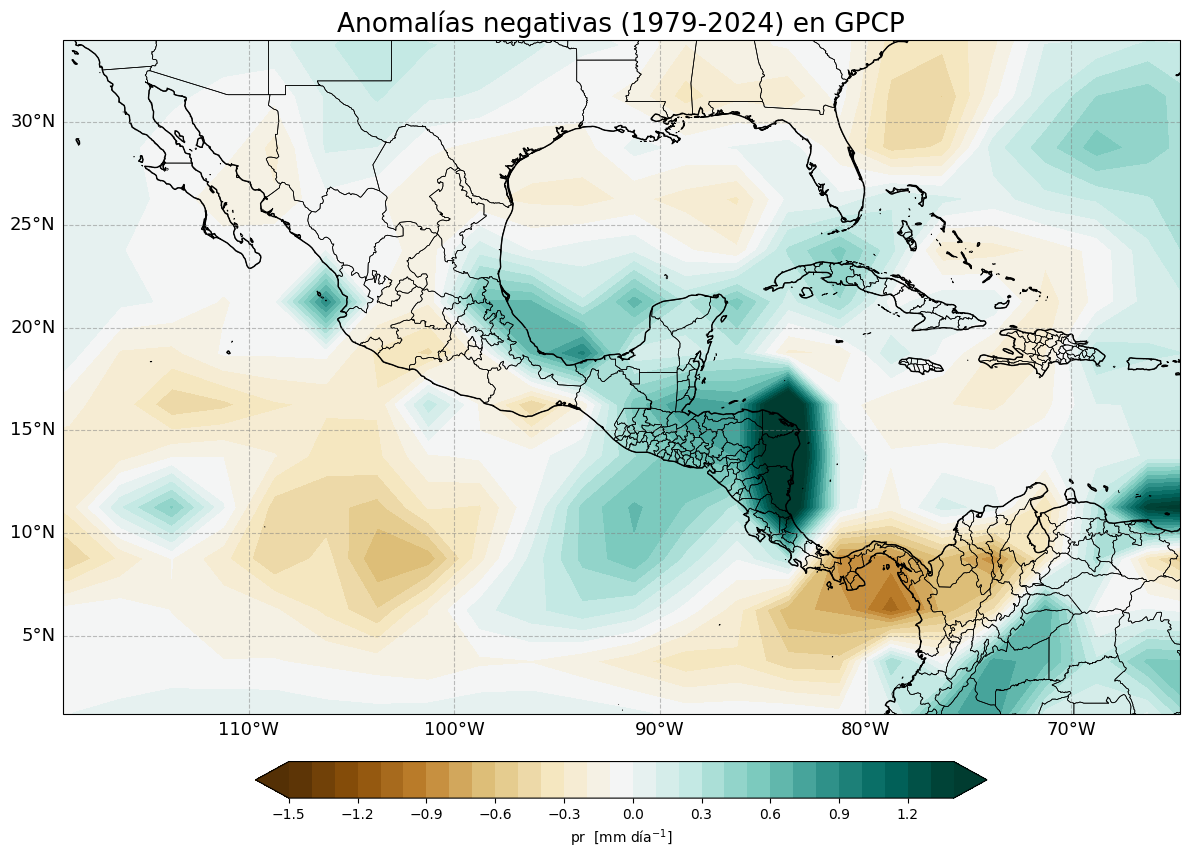

In [37]:
mapa_MC(anom_negativos, np.arange(-1.5, 1.5, 0.1), 'BrBG', 'Anomalías negativas (1979-2024) en GPCP', extend='both',
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)

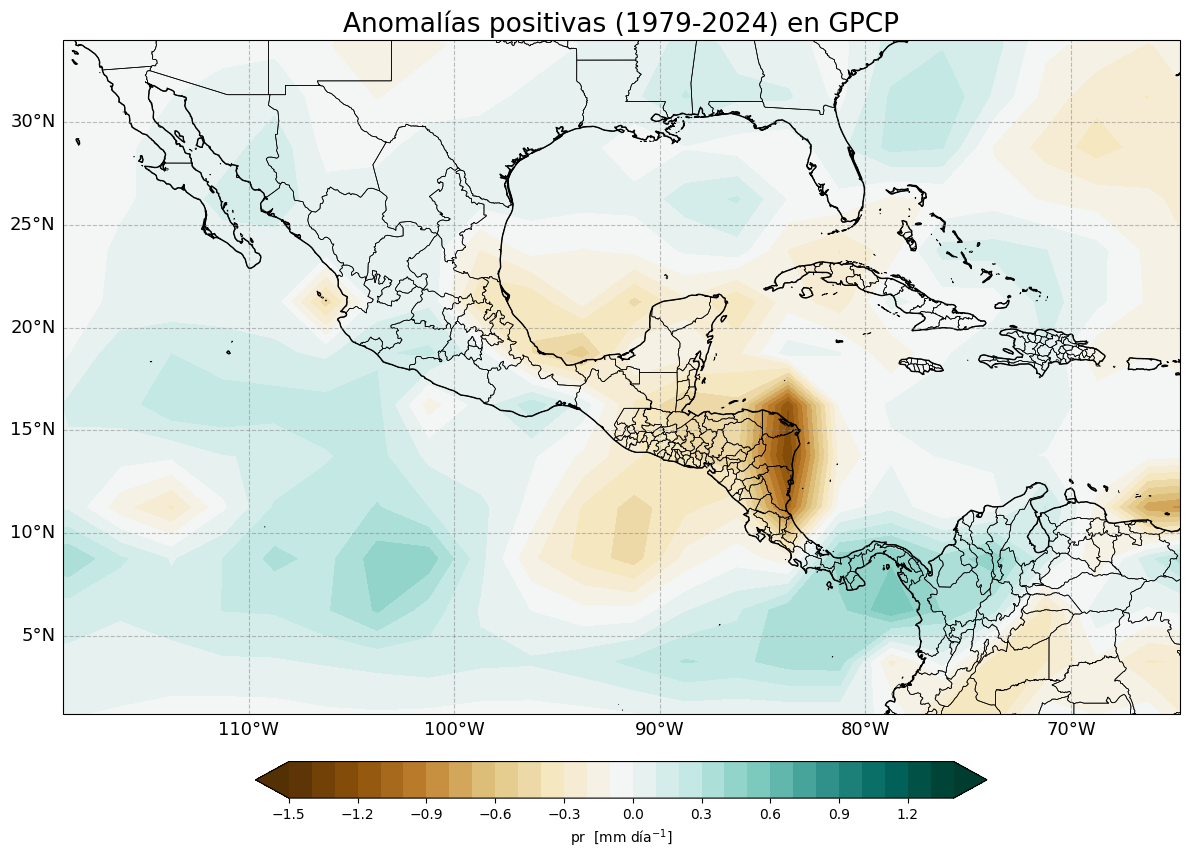

In [38]:
mapa_MC(anom_positivos, np.arange(-1.5, 1.5, 0.1), 'BrBG', 'Anomalías positivas (1979-2024) en GPCP',  extend='both', 
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)

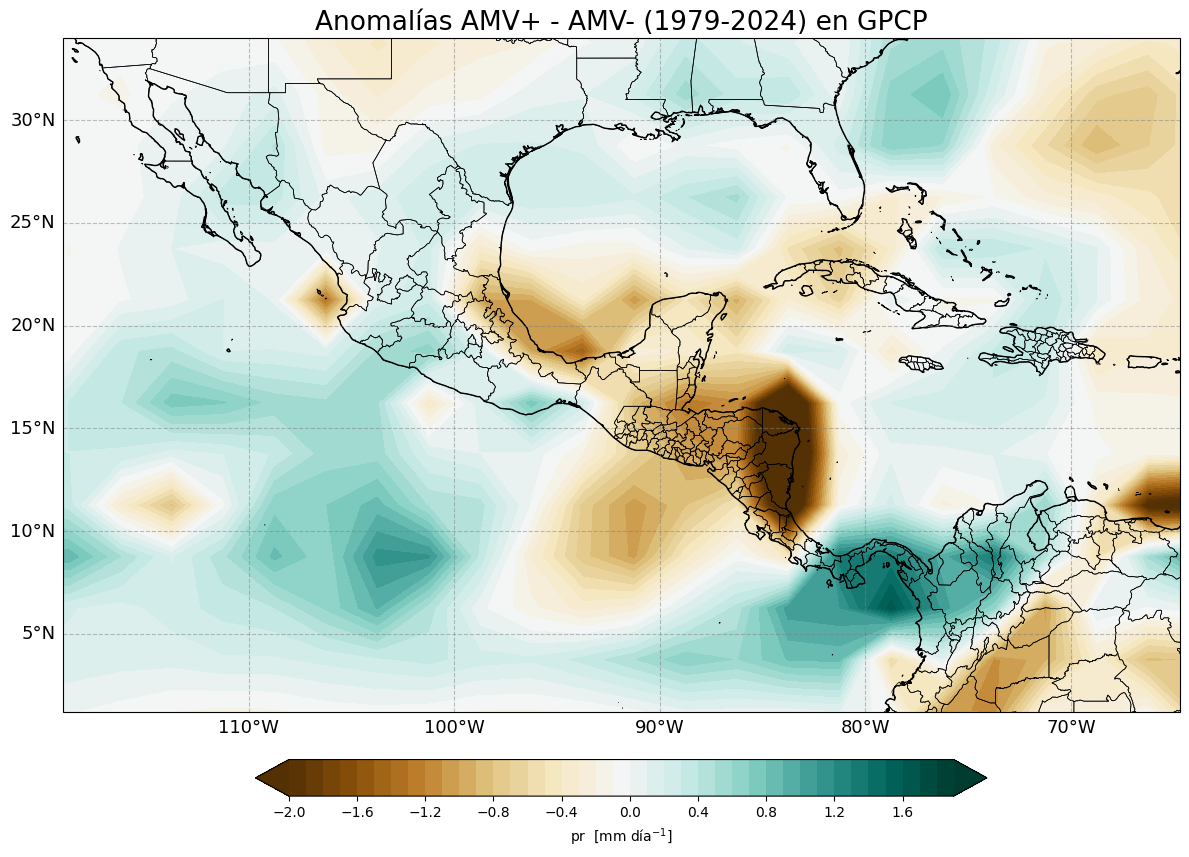

In [39]:
mapa_MC(anom_total, np.arange(-2, 2, 0.1), 'BrBG', 'Anomalías AMV+ - AMV- (1979-2024) en GPCP',  extend='both', 
        lon_min=240.9375, lon_max=295.3125, lat_min=1.2, lat_max=34)